In [11]:
# Importing the required libraries
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')



In [12]:
# Load the dataset
air_quality_df = pd.read_csv('https://archive.ics.uci.edu/static/public/360/data.csv')

In [13]:
# Display the first 5 rows of the dataset
air_quality_df.head()

# Describe the dataset
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [14]:
# Display the information of the dataset
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [15]:
# Five point summary of the dataset
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [16]:
# Check for missing values
air_quality_df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [17]:
# Check for duplicate values
air_quality_df.duplicated().sum()

0

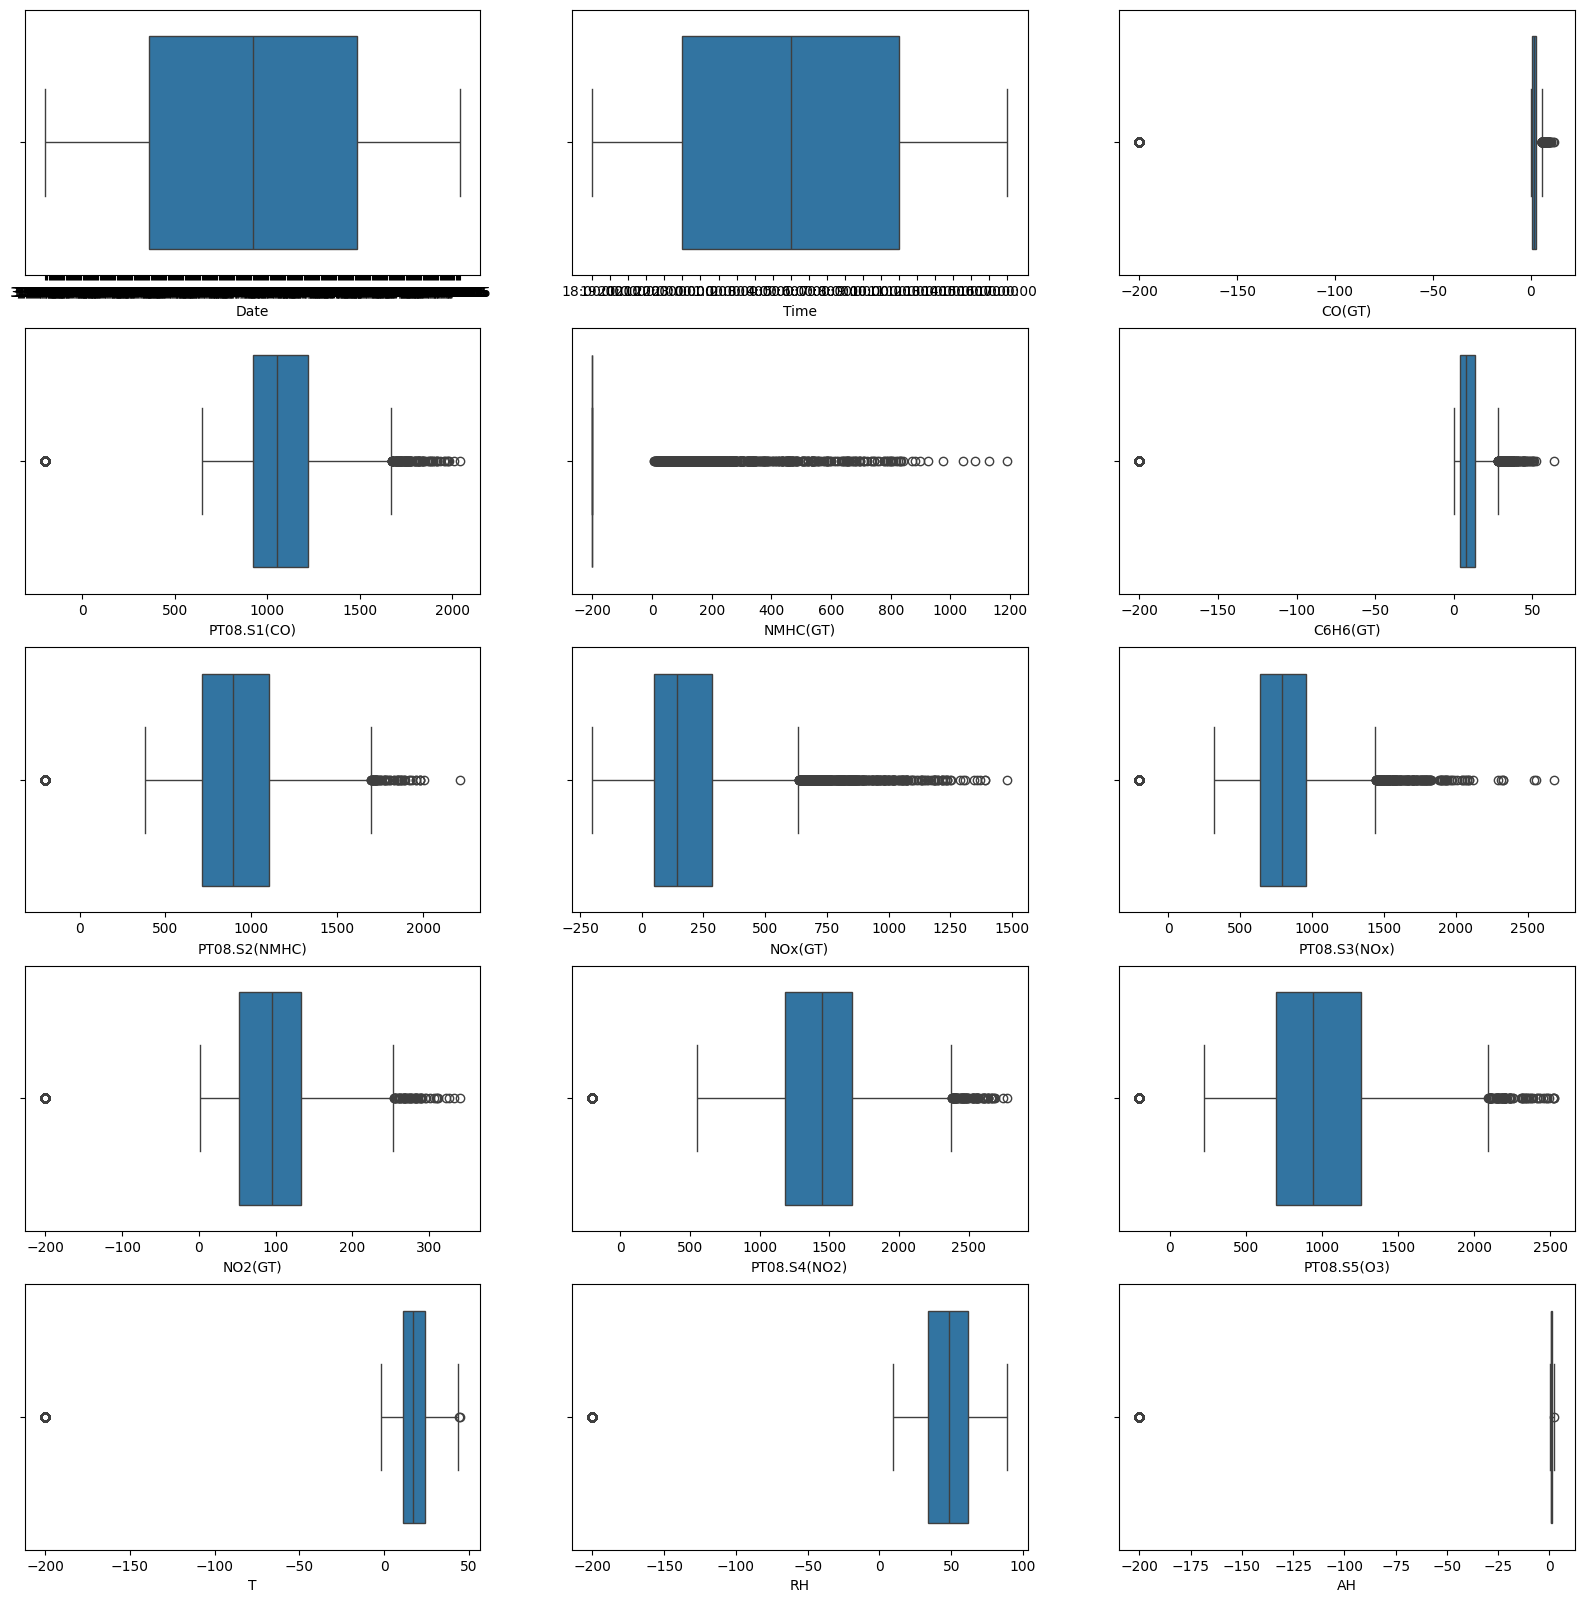

In [18]:
# Check for outliers in the dataset
plt.figure(figsize=(20, 20))

for i, column in enumerate(air_quality_df.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=air_quality_df, x=column)
    plt.xlabel(column)

plt.show()

In [19]:
# Check how many times -200 appears in the dataset
for col in air_quality_df.columns:
    print(col, ":" , len(air_quality_df[air_quality_df[col]== -200]), 'Number of times -200 appears in the column')
    print(col, ":" , len(air_quality_df[air_quality_df[col]== -200])/air_quality_df[col].count()*100, 'Number of times -200 appears in the column')

Date : 0 Number of times -200 appears in the column
Date : 0.0 Number of times -200 appears in the column
Time : 0 Number of times -200 appears in the column
Time : 0.0 Number of times -200 appears in the column
CO(GT) : 1683 Number of times -200 appears in the column
CO(GT) : 17.986534145559474 Number of times -200 appears in the column
PT08.S1(CO) : 366 Number of times -200 appears in the column
PT08.S1(CO) : 3.9115100993908305 Number of times -200 appears in the column
NMHC(GT) : 8443 Number of times -200 appears in the column
NMHC(GT) : 90.23191193758683 Number of times -200 appears in the column
C6H6(GT) : 366 Number of times -200 appears in the column
C6H6(GT) : 3.9115100993908305 Number of times -200 appears in the column
PT08.S2(NMHC) : 366 Number of times -200 appears in the column
PT08.S2(NMHC) : 3.9115100993908305 Number of times -200 appears in the column
NOx(GT) : 1639 Number of times -200 appears in the column
NOx(GT) : 17.51629795874746 Number of times -200 appears in th

In [20]:
# Copy the dataset to another variable
data_features = air_quality_df.copy()

In [21]:
# Review the columns with object data type
data_features.select_dtypes("object").head()

,Date,Time
0,3/10/2004,18:00:00
1,3/10/2004,19:00:00
2,3/10/2004,20:00:00
3,3/10/2004,21:00:00
4,3/10/2004,22:00:00


In [22]:
# Check min and max date to identify the range of the dataset
data_features['Date'].min(), data_features['Date'].max() 

# Convert the date column to datetime
data_features['Date'] = pd.to_datetime(data_features['Date'], format = '%m/%d/%Y')

# Check the data type of the date column
data_features['Date'].min(), data_features['Date'].max()  # corrected formats


(Timestamp('2004-03-10 00:00:00'), Timestamp('2005-04-04 00:00:00'))

In [23]:
# Explore the data types of the columns
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [24]:
# Remove the column with more than 50% missing values
data_features = data_features.drop('NMHC(GT)', axis=1)

In [25]:
# Replace -200 with the mean of the column for that day
for col in data_features.columns:
    if pd.api.types.is_numeric_dtype(data_features[col]):
      data_features[col] = data_features[col].replace(-200, data_features[col].mean())   

In [26]:
# Check if the -200 values have been replaced
data_features[data_features==-200].count()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

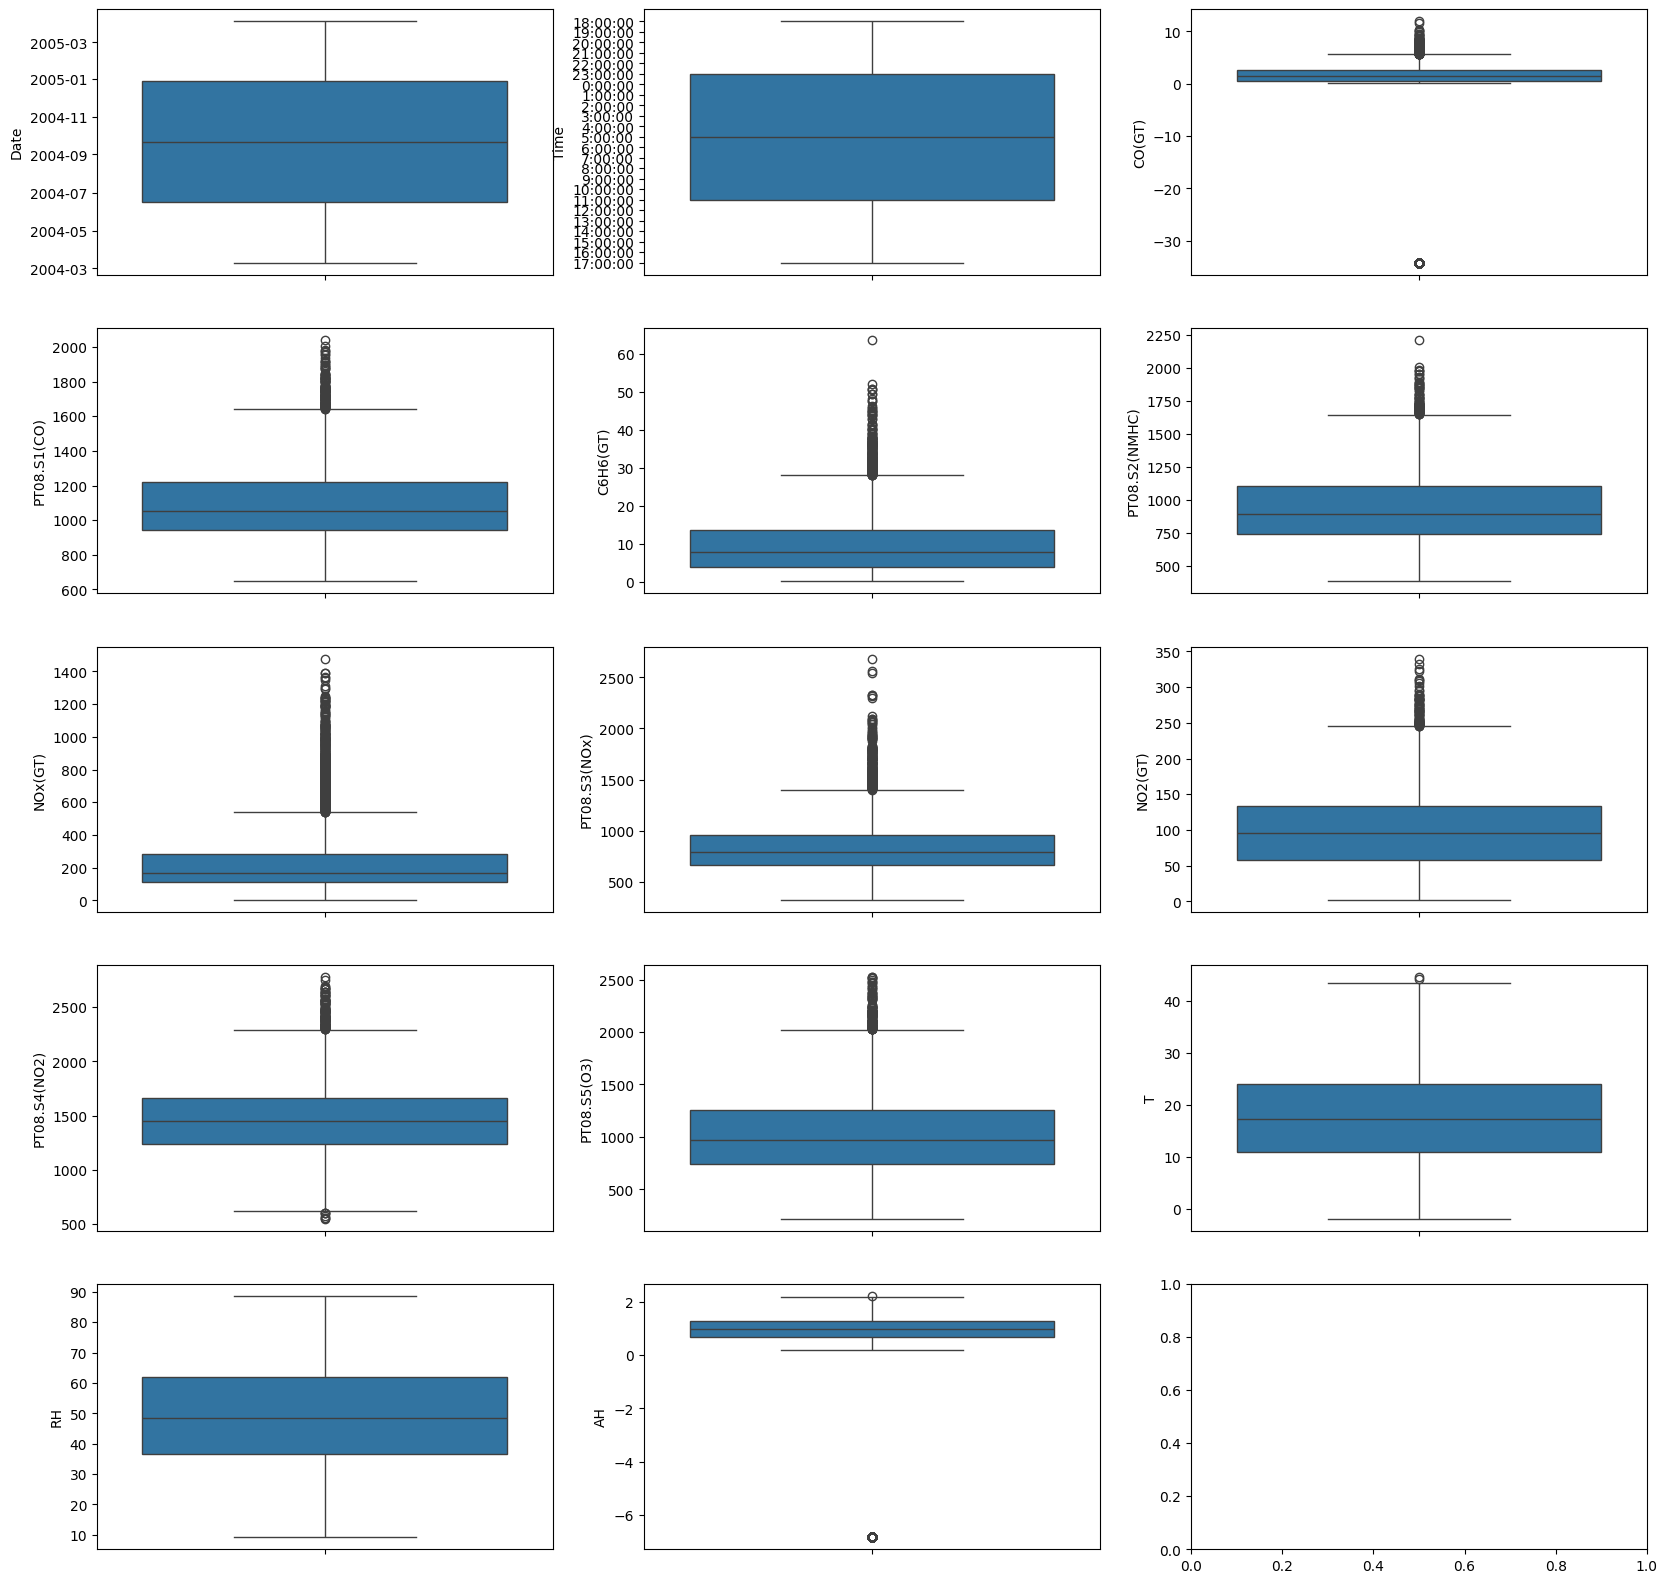

In [27]:
# Now, let's check for outliers in the dataset

fig, ax = plt.subplots(5, 3, figsize=(20, 20))
for variable, subplot in zip(data_features.columns, ax.flatten()):
    sns.boxplot(data_features[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [28]:
# Outlier Removal 
numerical_columns = data_features.select_dtypes(include=[np.number])

# Calculate quartiles and IQR for numerical columns
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))

# Remove outliers from the original DataFrame
data_features = data_features[~outliers.any(axis=1)]

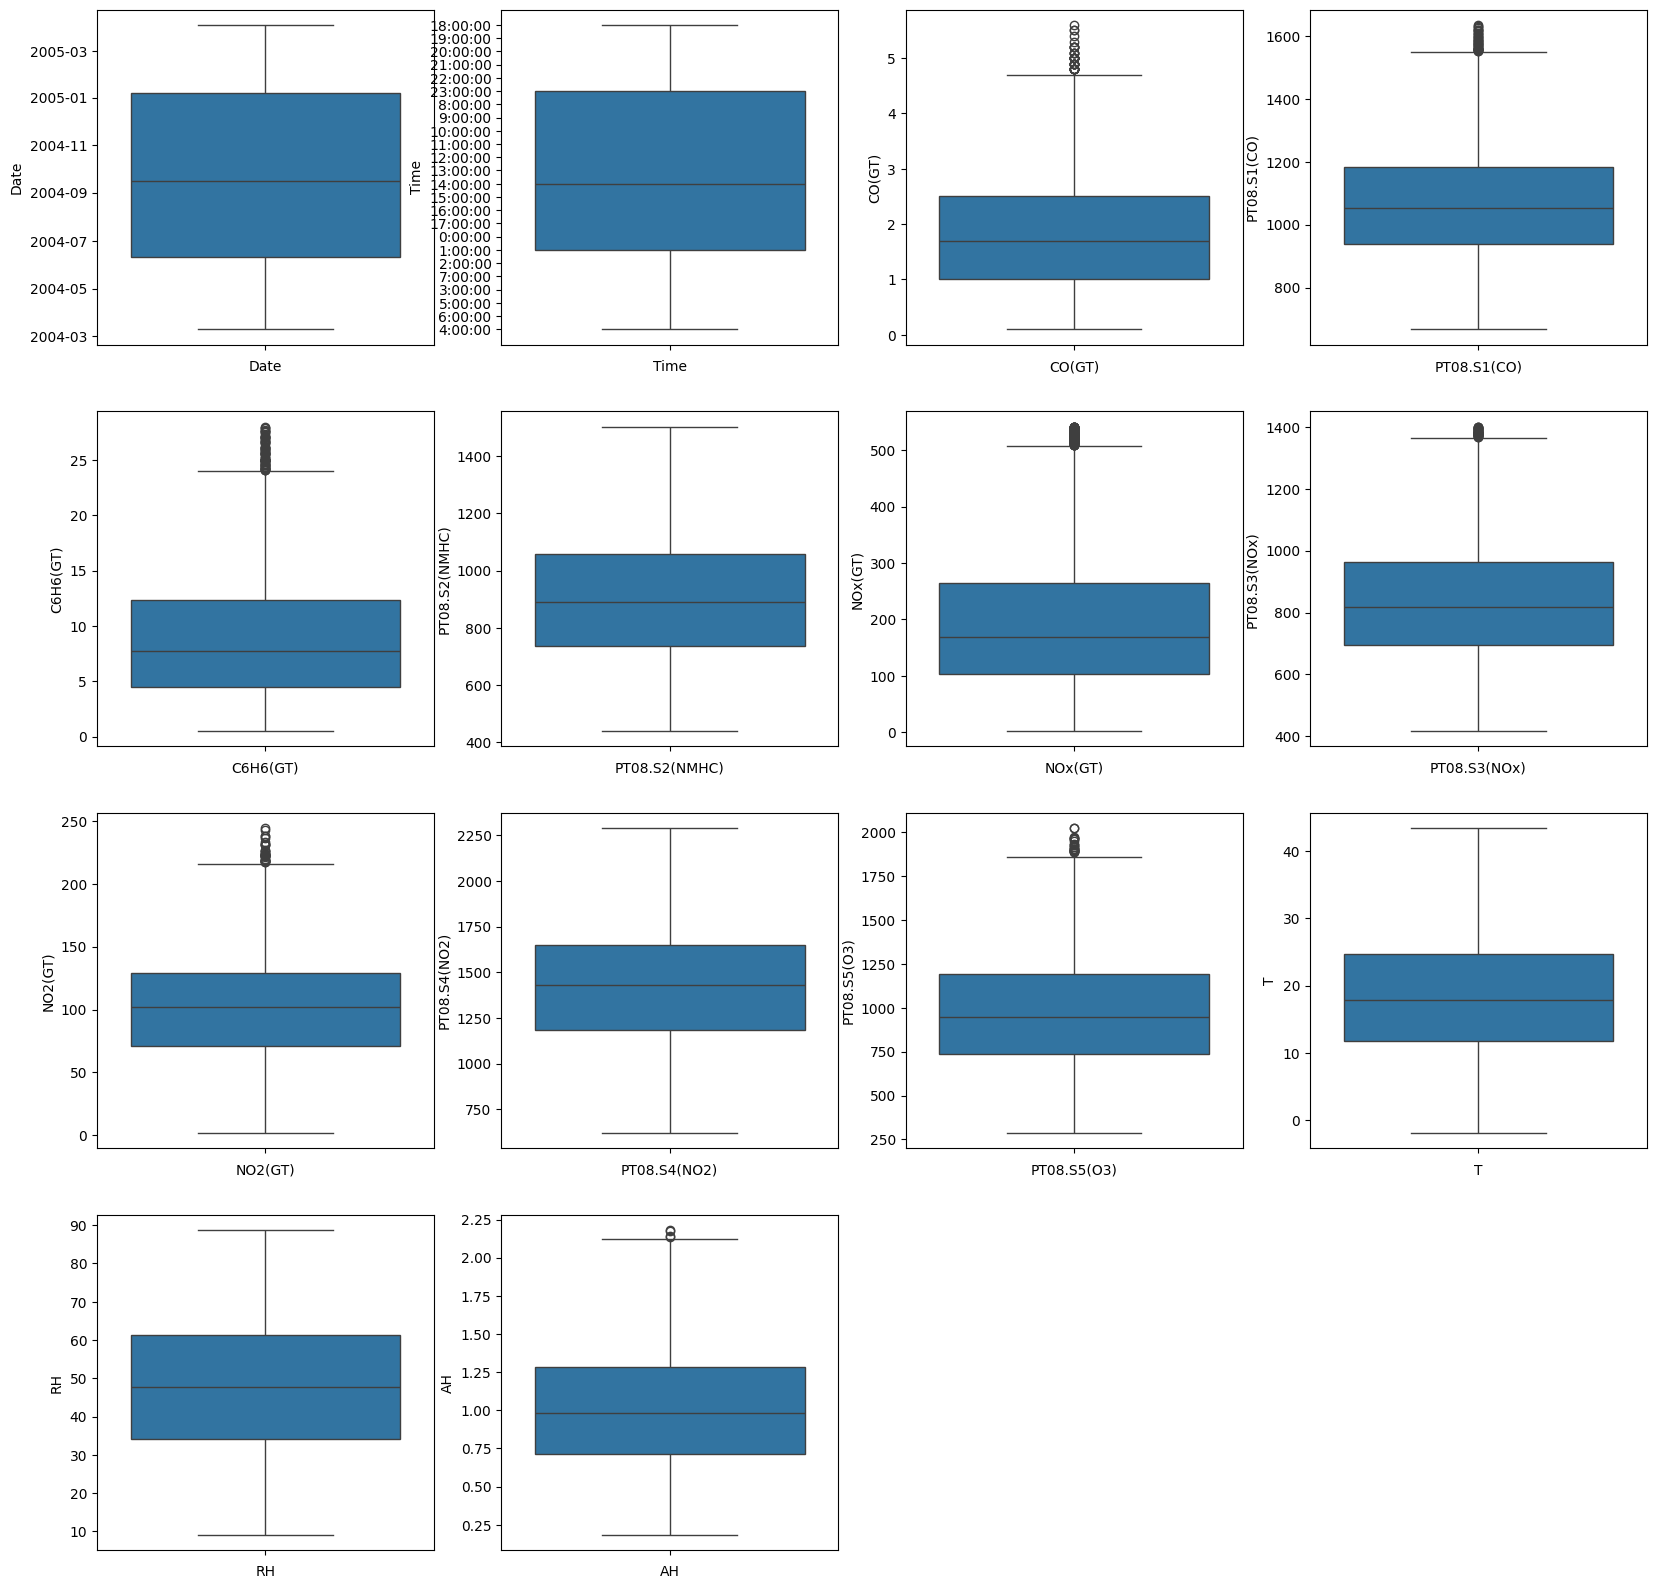

In [29]:
# Let's check for outliers again
plt.figure(figsize=(20, 20))
for i, column in enumerate(data_features.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data_features[column])
    plt.xlabel(column)

<Axes: >

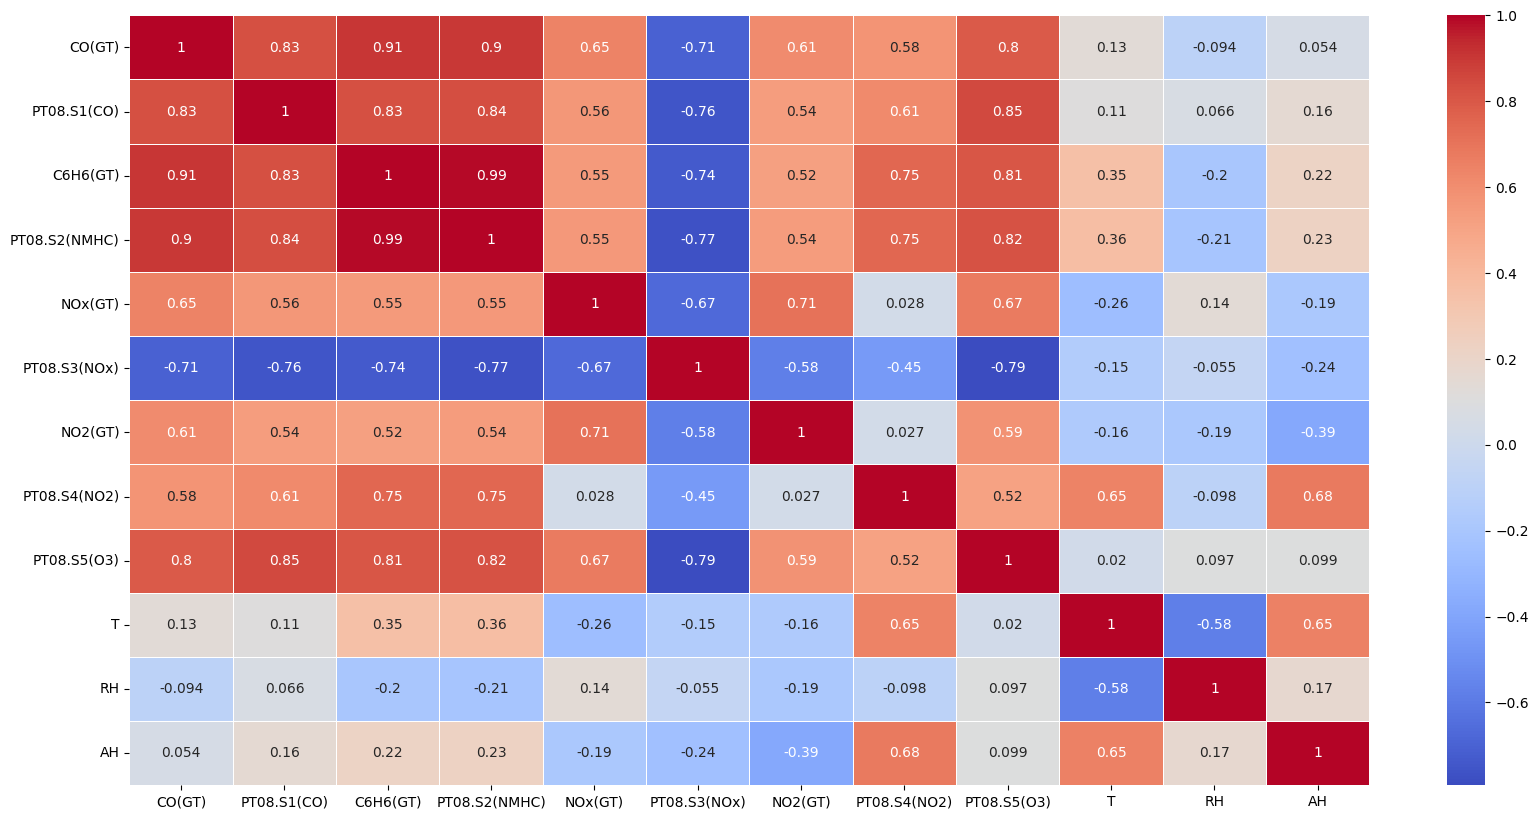

In [30]:
# Identify the correlation between the features
plt.figure(figsize=(20, 10))
numerical_columns = data_features.select_dtypes(include=[np.number])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [31]:
# find the features that are having similar correlation and add them to a list
correlated_features = set()
correlation_matrix = numerical_columns.corr()
threshold = 0.60

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)


{'NO2(GT)', 'AH', 'PT08.S4(NO2)', 'PT08.S3(NOx)', 'NOx(GT)', 'T', 'PT08.S2(NMHC)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S5(O3)'}


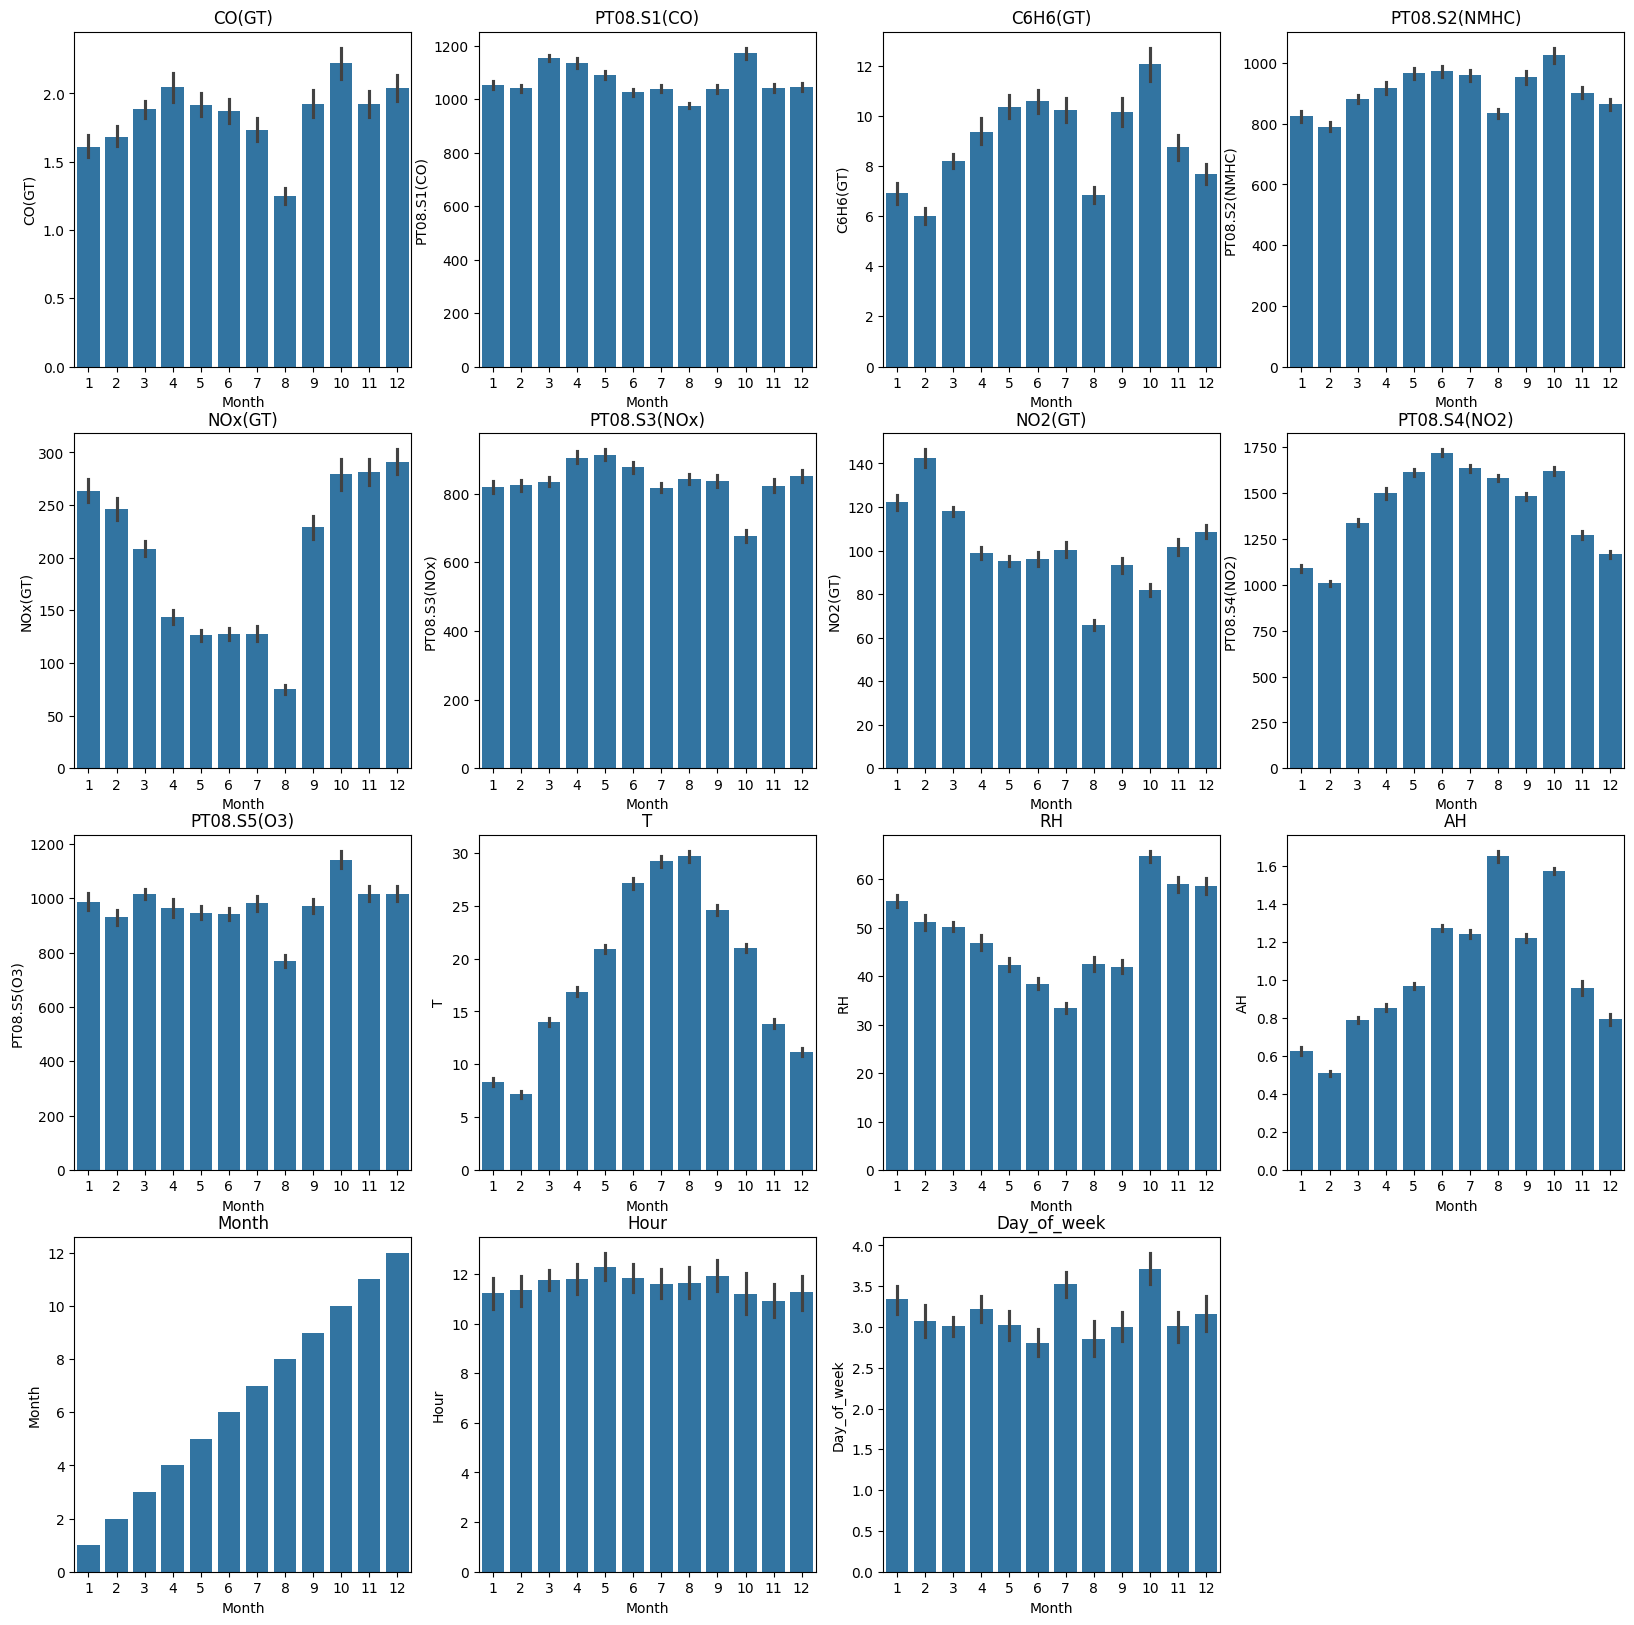

In [32]:
# Check Distribution of Pollutants by Month

# Extracting month from date
data_features['Date'] = pd.to_datetime(data_features['Date'])
data_features['Month'] = data_features['Date'].dt.month

# Extracting hour from time format - HH.MM.SS
data_features['Time'] = pd.to_datetime(data_features['Time'], format='%H:%M:%S')
data_features['Hour'] = data_features['Time'].dt.hour

# Extracting day of the week from date
data_features['Day_of_week'] = data_features['Date'].dt.dayofweek

# Plot distribution by Month for each column 
plt.figure(figsize=(20, 20))
for i, col in enumerate(data_features.columns[2:]):
    plt.subplot(4, 4, i+1)
    sns.barplot(data=data_features, x='Month', y=col)
    plt.title(col)

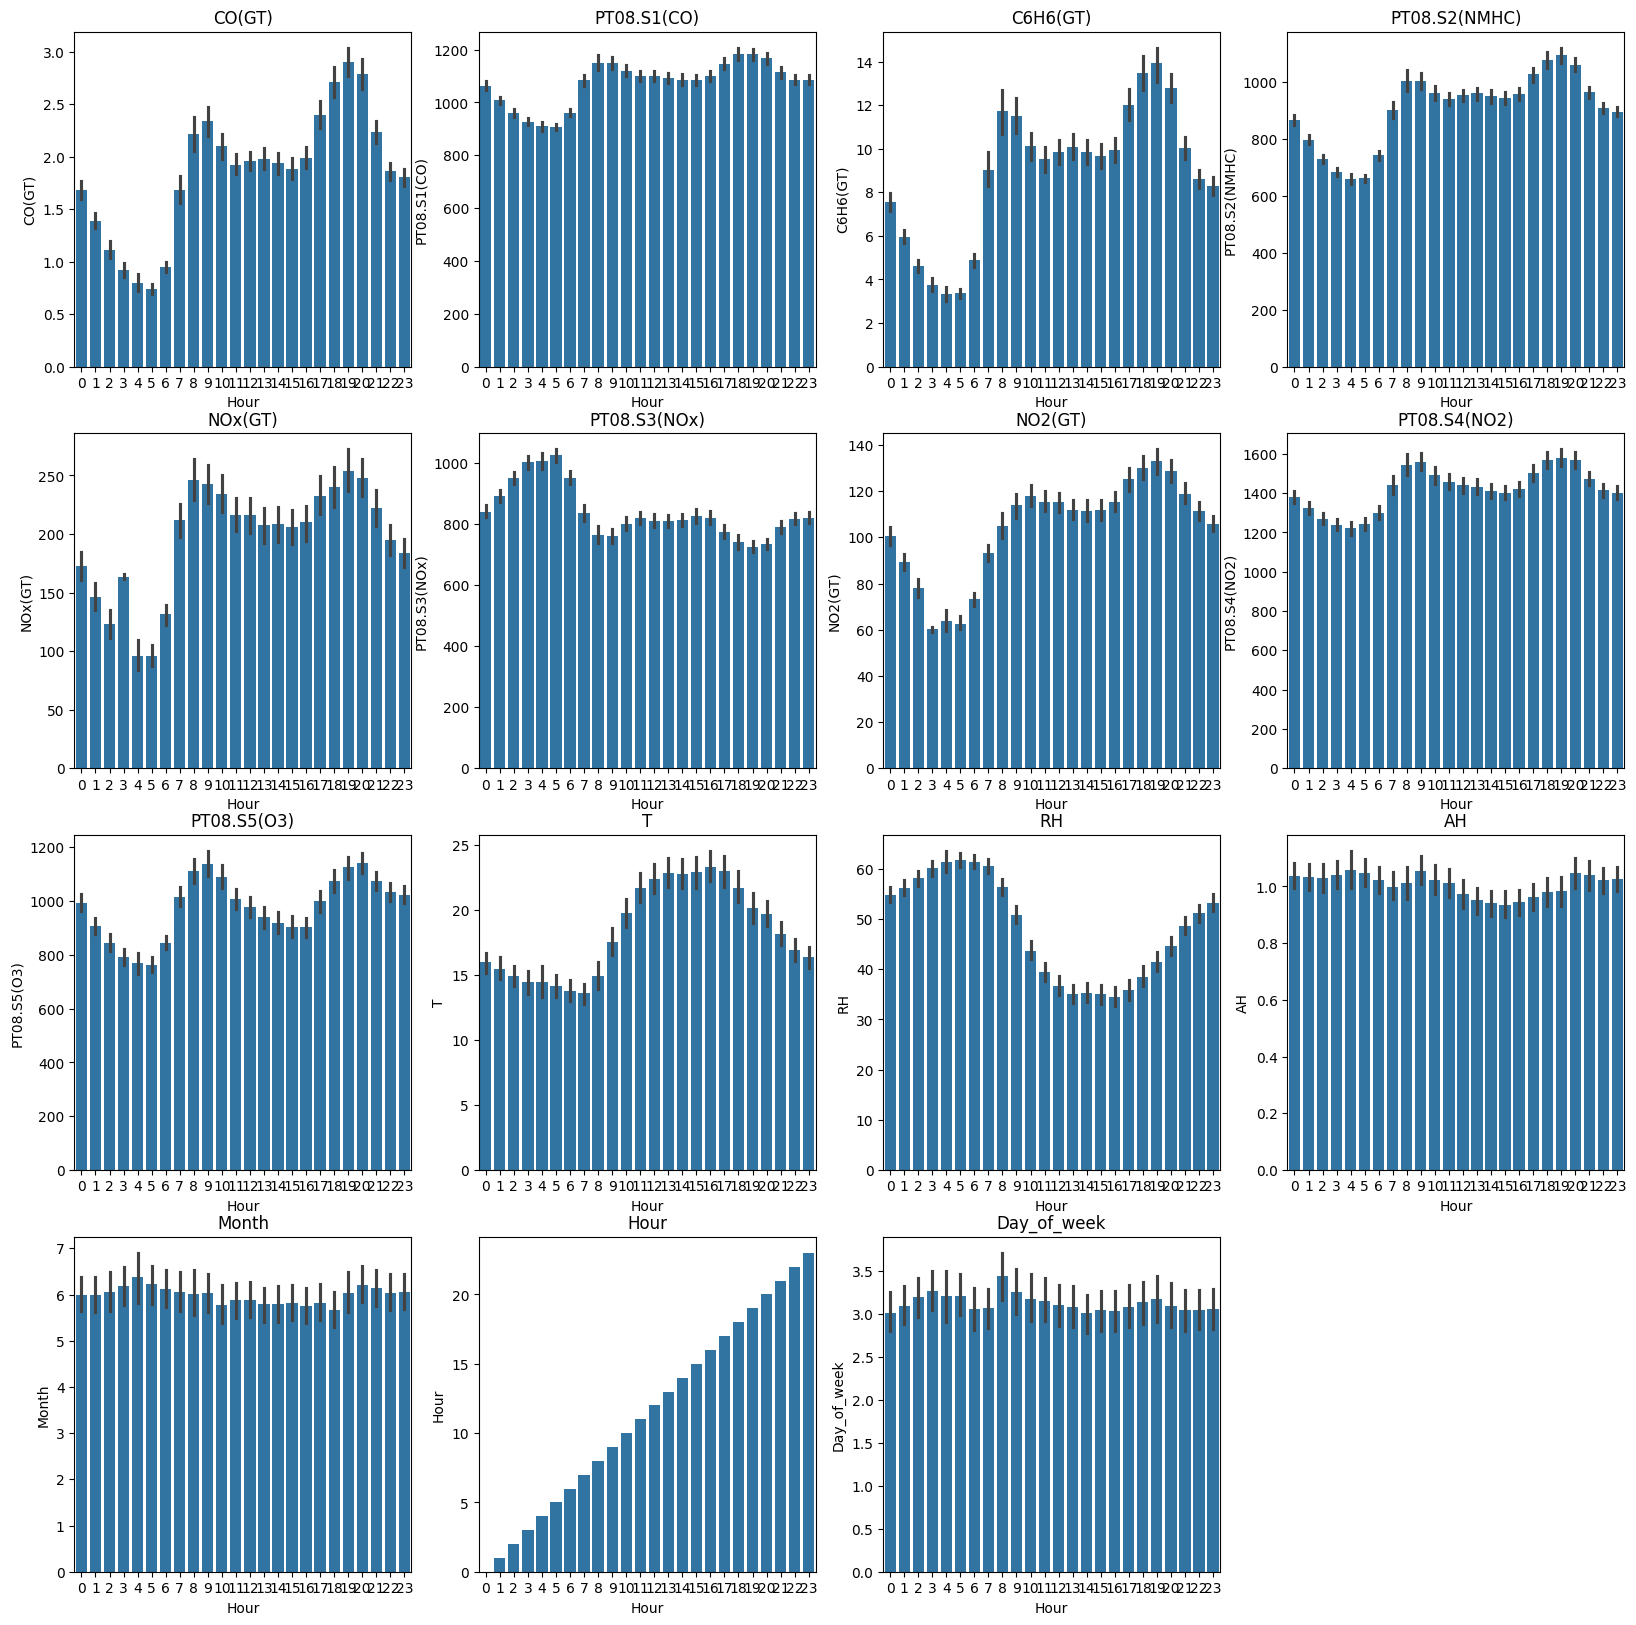

In [33]:
# Plot distribution by Hour for each column 
plt.figure(figsize=(20, 20))
for i, col in enumerate(data_features.columns[2:]):
    plt.subplot(4, 4, i+1)
    sns.barplot(data=data_features, x='Hour', y=col)
    plt.title(col)

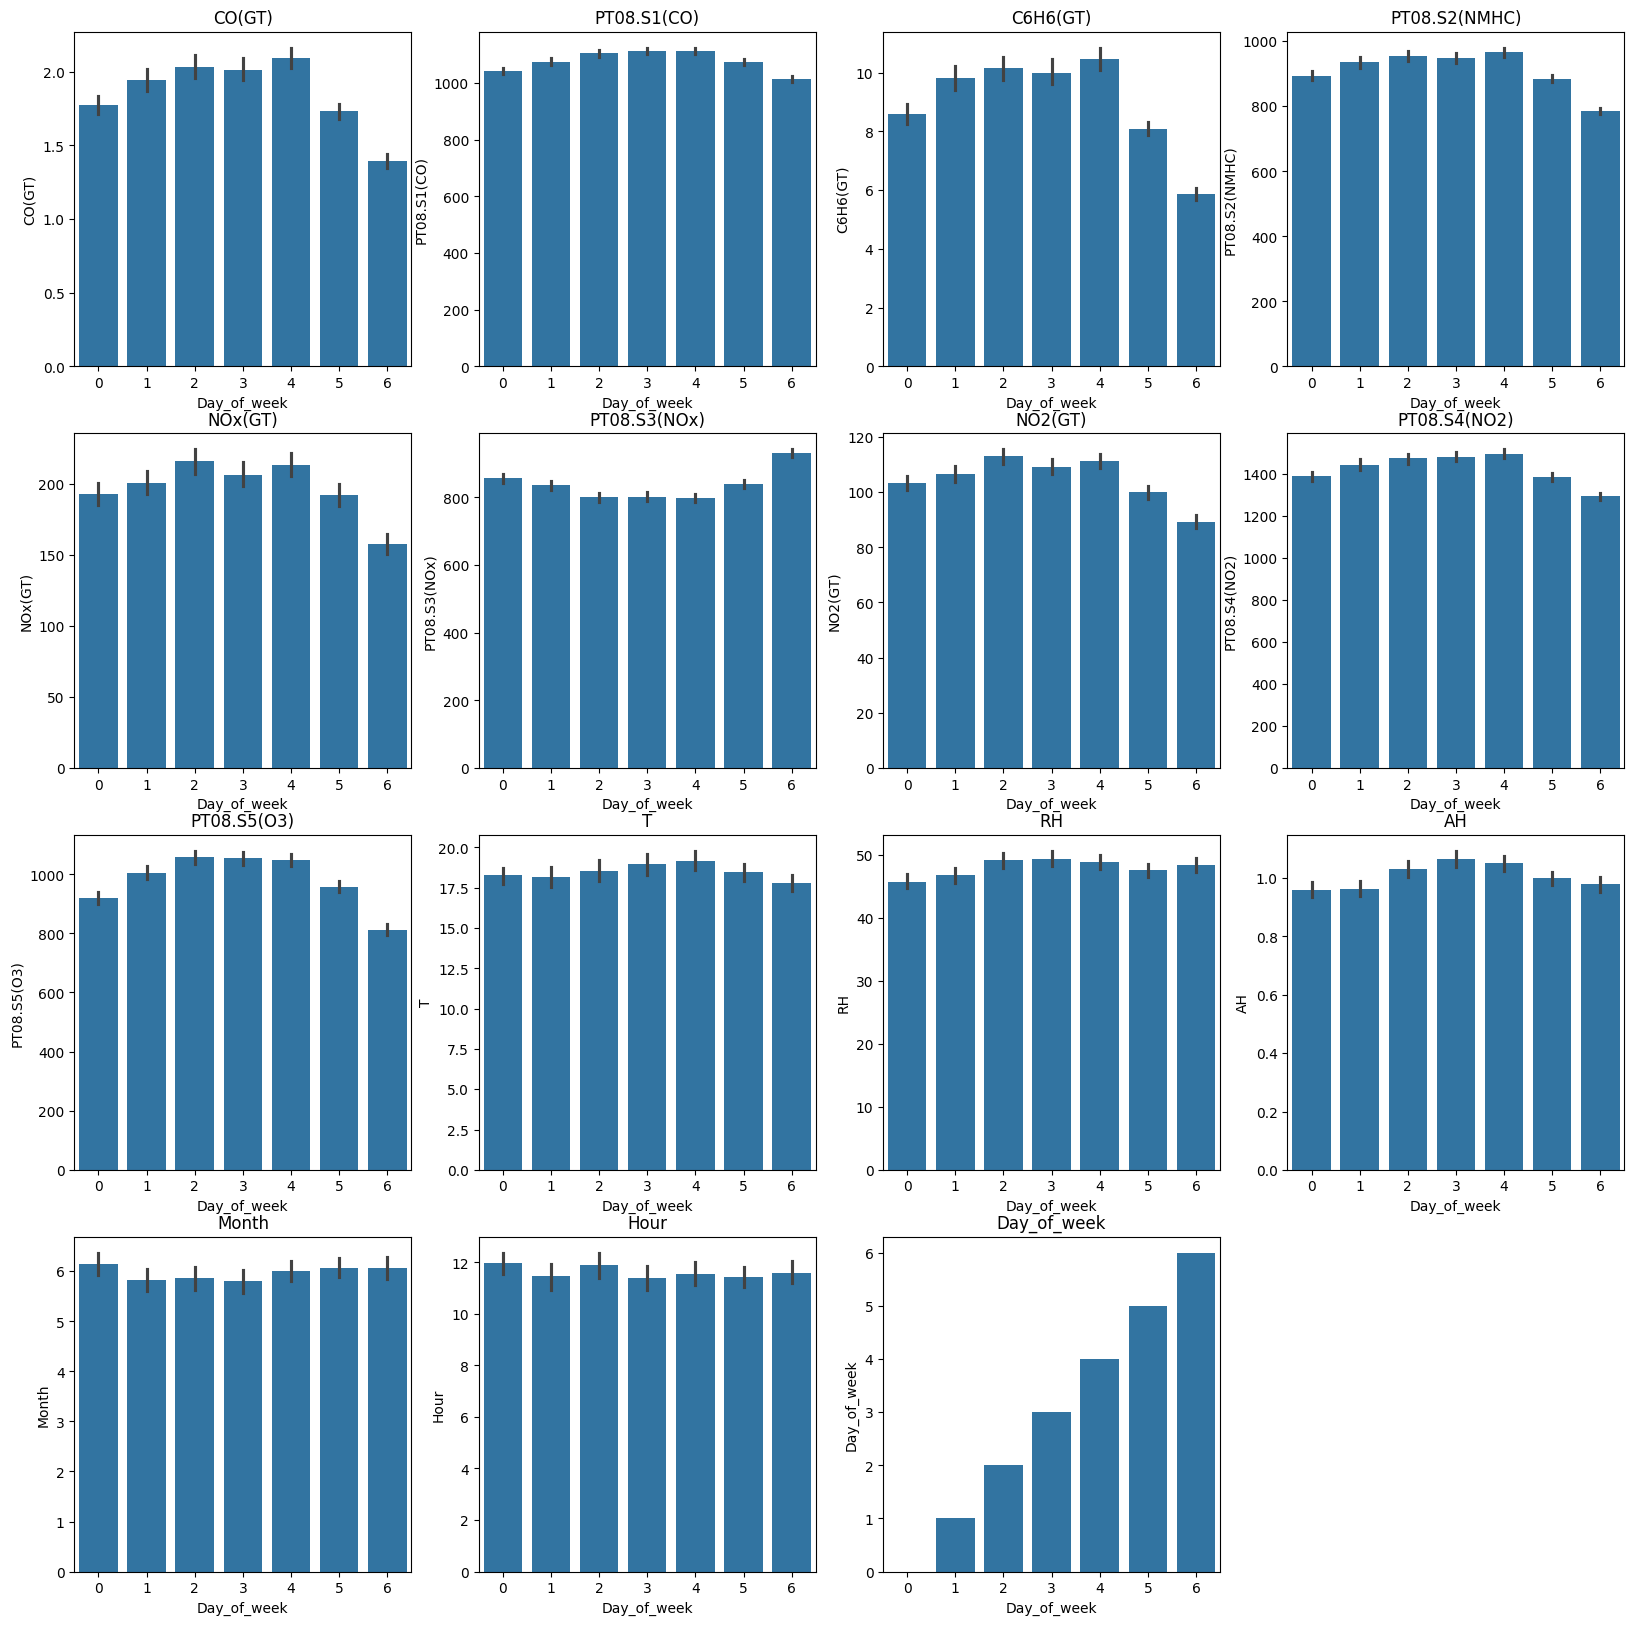

In [34]:
# Plot distribution by Day of the week for each column
plt.figure(figsize=(20, 20))
for i, col in enumerate(data_features.columns[2:]):
    plt.subplot(4, 4, i+1)
    sns.barplot(data=data_features, x='Day_of_week', y=col)
    plt.title(col)

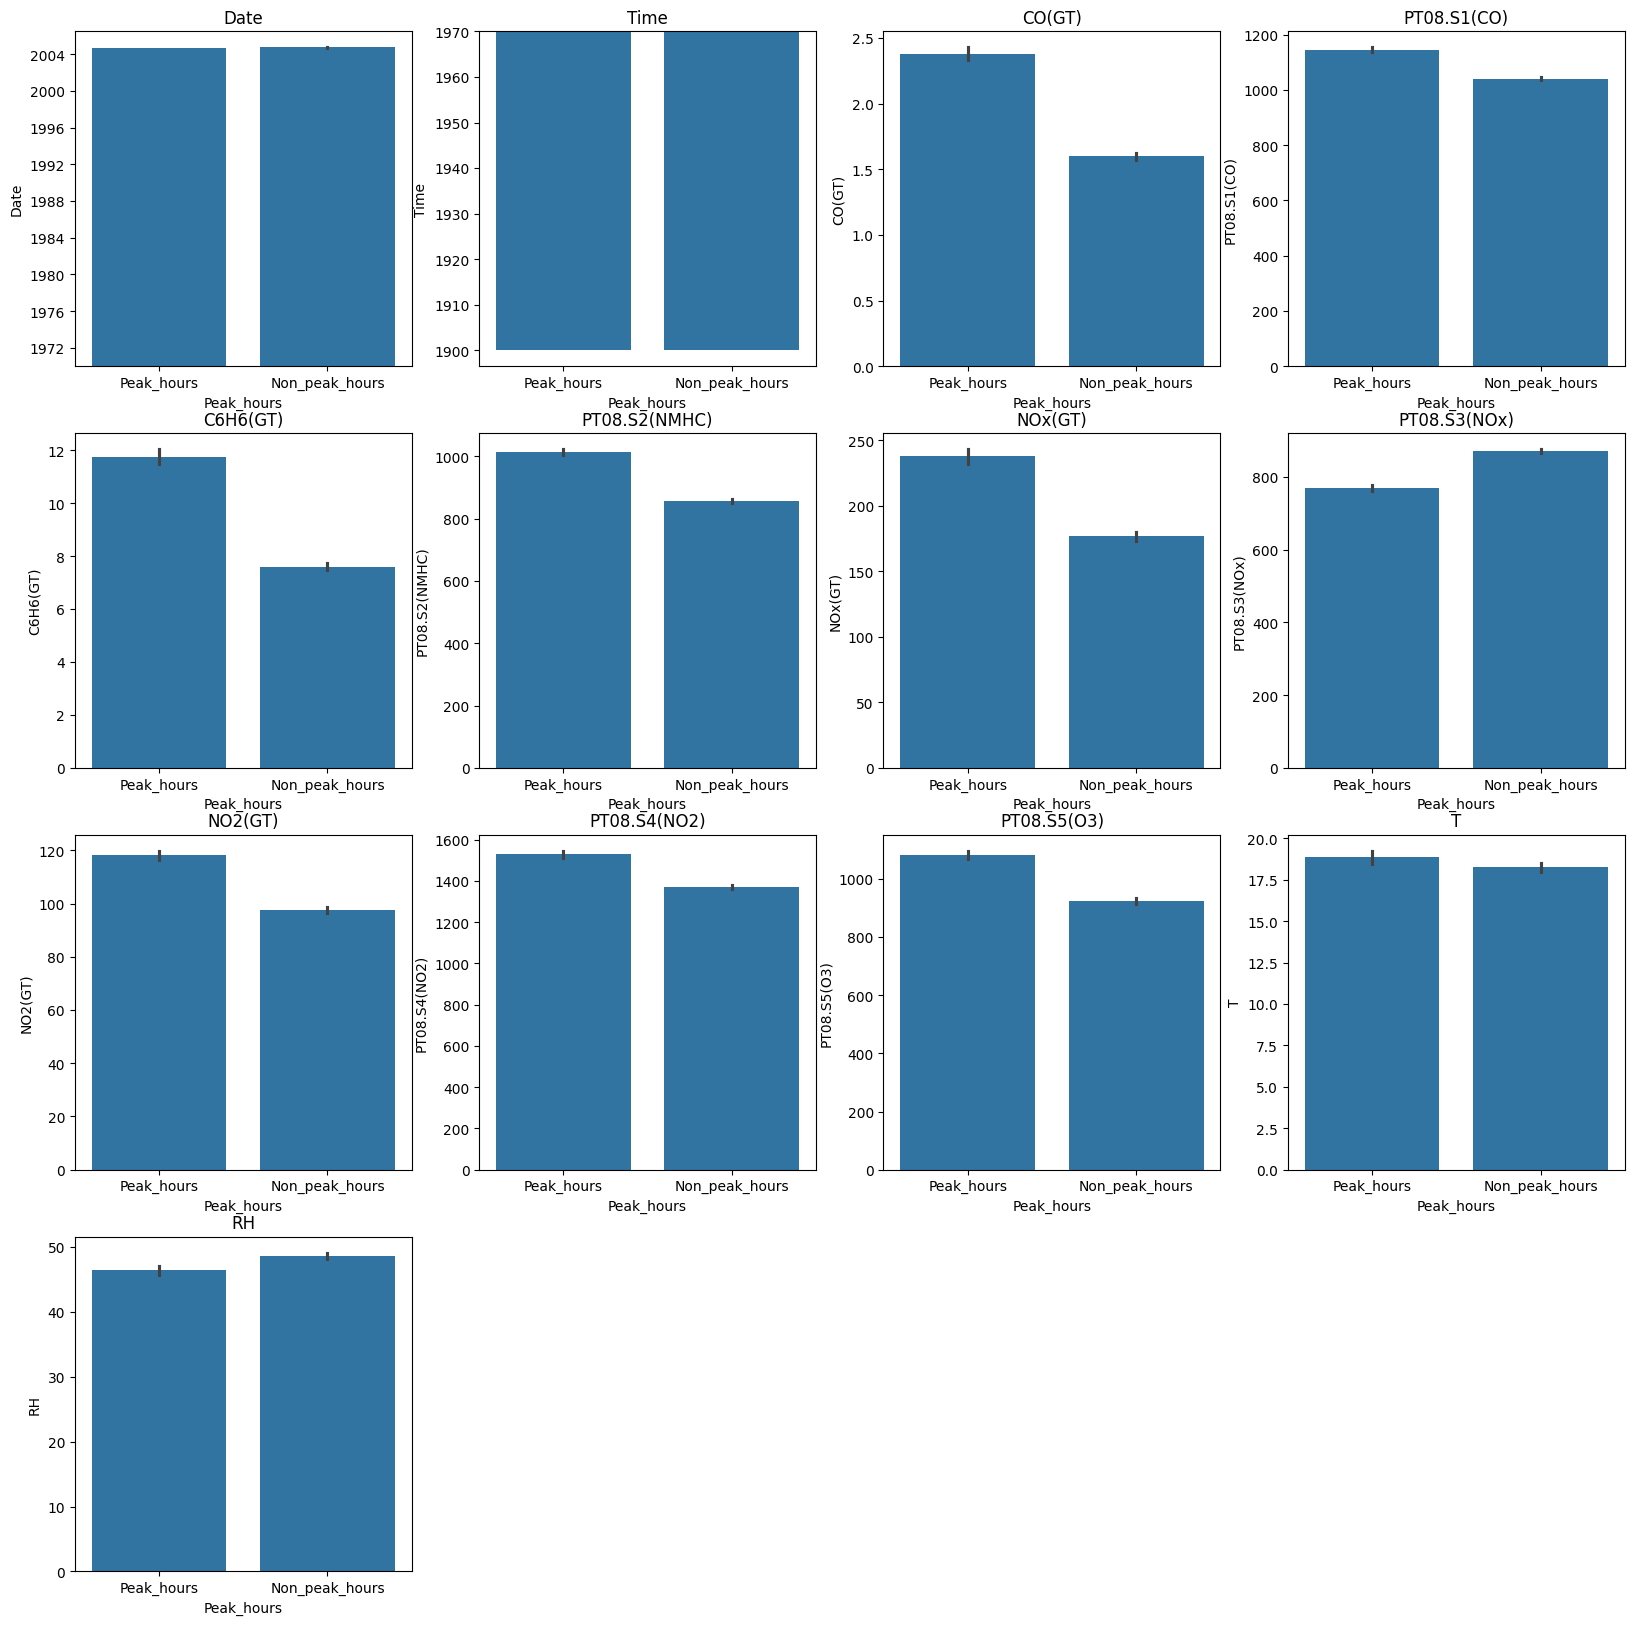

In [35]:
# Split the data into peak and non peak hours and check the distribution of pollutants
data_features['Peak_hours'] = np.where((data_features['Hour']>=7) & (data_features['Hour']<=10), 'Peak_hours', 
                                             np.where((data_features['Hour']>=17) & (data_features['Hour']<=20), 'Peak_hours', 'Non_peak_hours'))


# Plot distribution of pollutants in peak and non peak hours from CO(GT) to AH
plt.figure(figsize=(20, 20))
for i, col in enumerate(data_features.columns[:13]):
    plt.subplot(4, 4, i+1)
    sns.barplot(data=data_features, x='Peak_hours', y=col)
    plt.title(col)


In [36]:
# Encoding the categorical columns
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder() 
    data_features[c1]= label_encoder.fit_transform(data_features[c1])
    data_features[c1].unique()
    return data_features 

In [37]:
LABEL_ENCODING('Date')

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour,Day_of_week,Peak_hours
0,0,1900-01-01 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,18,2,Peak_hours
1,0,1900-01-01 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,19,2,Peak_hours
2,0,1900-01-01 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,20,2,Peak_hours
3,0,1900-01-01 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,21,2,Non_peak_hours
4,0,1900-01-01 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,22,2,Non_peak_hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,346,1900-01-01 10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,4,10,0,Peak_hours
9353,346,1900-01-01 11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,4,11,0,Non_peak_hours
9354,346,1900-01-01 12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,4,12,0,Non_peak_hours
9355,346,1900-01-01 13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,4,13,0,Non_peak_hours


***PCA Analysis to reduce the dimensionality of the dataset***

In [38]:
# Select the features and the target variable
X = data_features[['CO(GT)', 'PT08.S1(CO)', 'T', 'AH', 'RH']]


In [39]:
# Convert the dataset to standard scale
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
pca = PCA()  
X_pca = pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_  

In [40]:
# Cummulative sum of the explained variance ratio

# The first 4 components explain 99% of the variance in the dataset
explained_variance_ratio.cumsum()


array([0.40572935, 0.72779107, 0.96231043, 0.99260709, 1.        ])

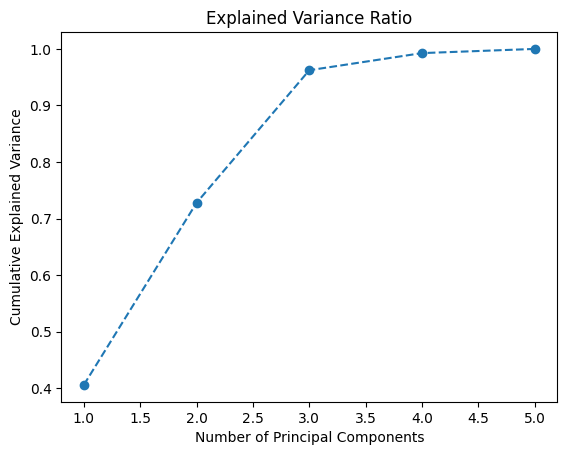

We could reduce the dimensionality of the dataset to 4 principal components and still retain 99% of the variance in the dataset


In [41]:
# Plot the explained variance ratio

plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')  
plt.xlabel('Number of Principal Components')  
plt.ylabel('Cumulative Explained Variance')  
plt.title('Explained Variance Ratio')  
plt.show()  

print('We could reduce the dimensionality of the dataset to 4 principal components and still retain 99% of the variance in the dataset')

In [42]:
#  select only response variables and predictors
data_features = data_features[['CO(GT)', 'PT08.S1(CO)', 'T', 'AH', 'RH']]


In [43]:
# Identify linear and non-linear columns in the data_features dataset

# Linear columns
linear_columns = []
non_linear_columns = []
for col in data_features.columns:
    if data_features[col].nunique() > 10:
        linear_columns.append(col)
    else:
        non_linear_columns.append(col)

print('Linear columns:', linear_columns)
print('Non-linear columns:', non_linear_columns)



Linear columns: ['CO(GT)', 'PT08.S1(CO)', 'T', 'AH', 'RH']
Non-linear columns: []


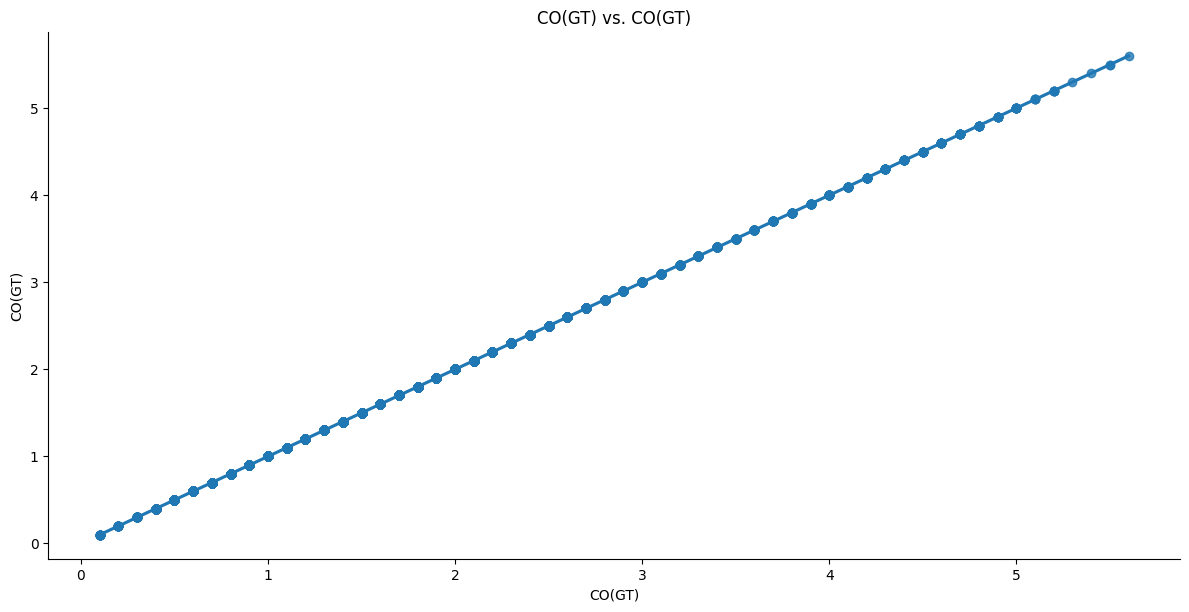

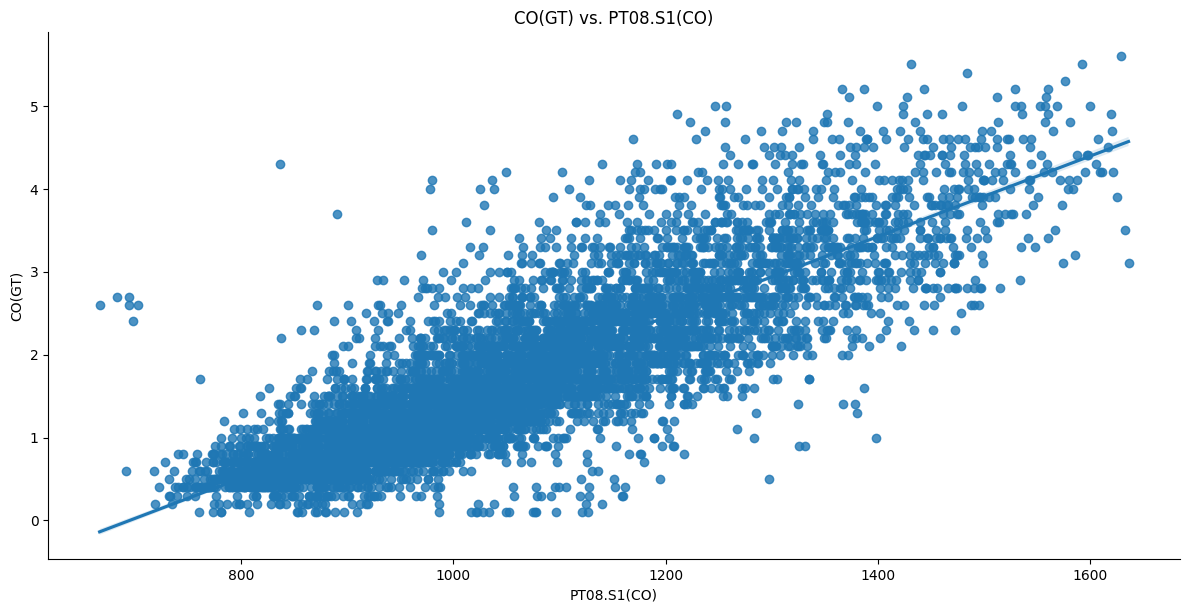

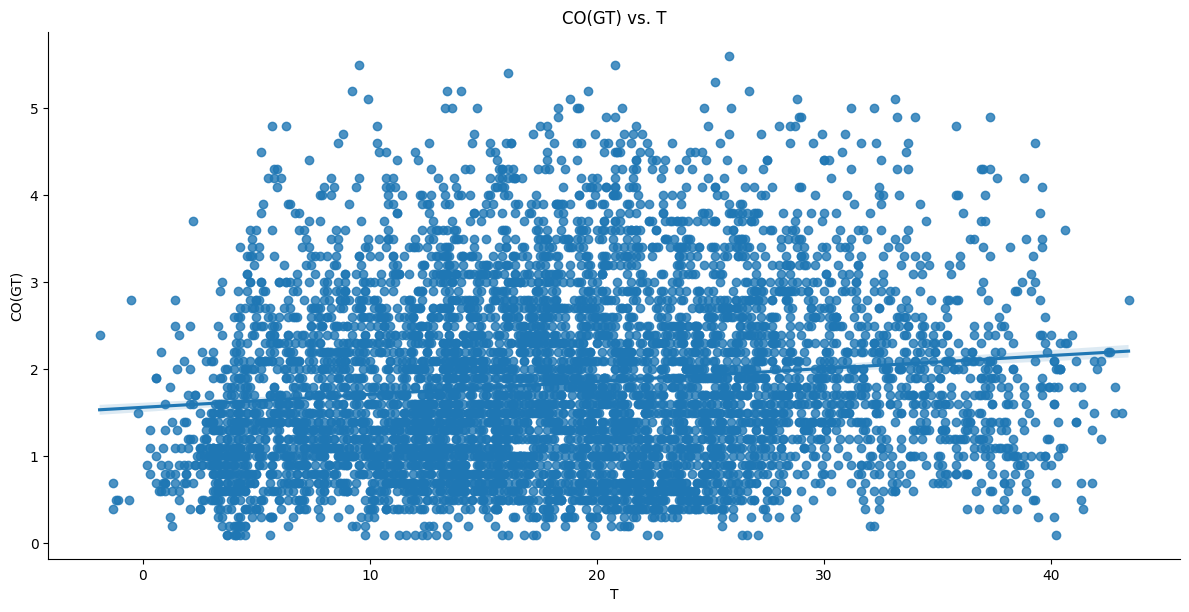

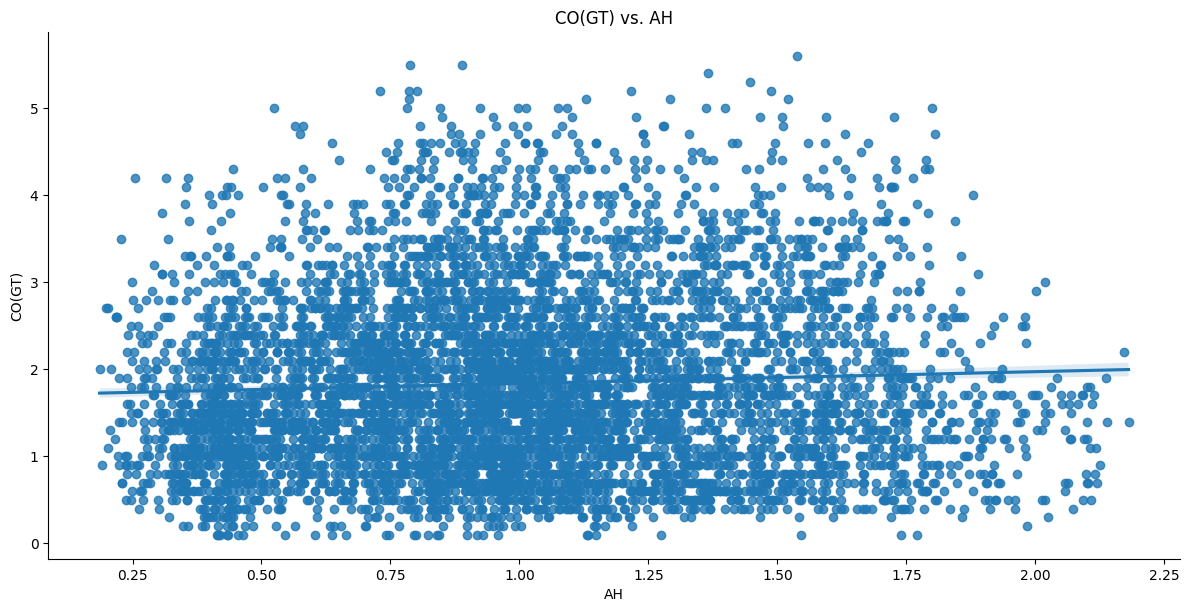

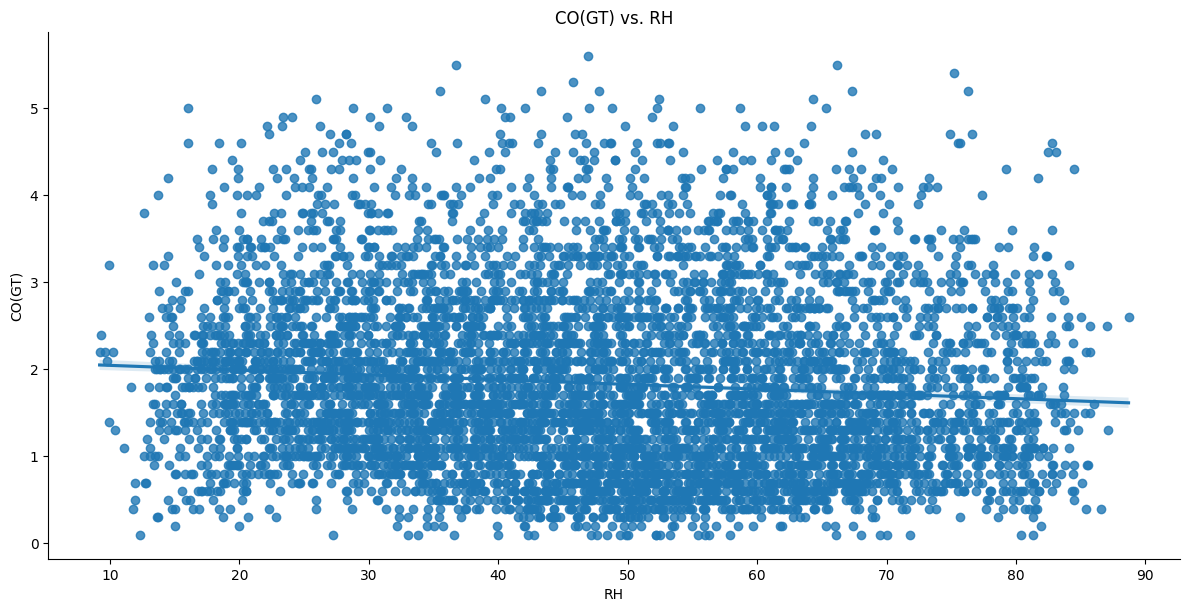

In [44]:
# Plot the features against the date column
for col in data_features.columns:
    sns.lmplot(x=col, y='CO(GT)', data=data_features, aspect=2, height=6)
    plt.title('CO(GT) vs. ' + col)

***Models to predict the target variable.***

***Linear Regression***

In [45]:
# Define the features and the target variable
X = data_features[['PT08.S1(CO)', 'T', 'AH', 'RH']]
y = data_features['CO(GT)']

#Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Predicting the target variable using the linear regression model. The linear regression model is a simple model that assumes a linear relationship between the input variables and the output variable. The model is trained using the training data and then used to predict the target variable using the test data.

In [46]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse_linear_regression_without_pca = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE of Linear Regression:', rmse_linear_regression_without_pca)

# Calculate the R-squared
from sklearn.metrics import r2_score
r2_linear_regression_without_pca = r2_score(y_test, y_pred)
print('R-squared of Linear Regression:', r2_linear_regression_without_pca)


RMSE of Linear Regression: 0.556558932592898
R-squared of Linear Regression: 0.6963458744966279


In [47]:
# we will apply PCA with 4 components and then apply the linear regression model

pca = PCA(n_components=4)

# Fit the PCA instance to the dataset
X_train_pca = pca.fit_transform(X_train)

# Transform the test set
X_test_pca = pca.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Calculate the RMSE
rmse_linear_regression_with_pca = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE of Linear Regression with PCA:', rmse_linear_regression_with_pca)

# Calculate the R-squared
r2_linear_regression_with_pca = r2_score(y_test, y_pred)
print('R-squared of Linear Regression with PCA:', r2_linear_regression_with_pca)



RMSE of Linear Regression with PCA: 0.556558932592898
R-squared of Linear Regression with PCA: 0.696345874496628


***Random Forest***

Random forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct for decision trees' habit of overfitting to their training set.

In [48]:
# Create a random forest regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predicating the target variable using the random forest model. The random forest model is trained using the training data and then used to predict the target variable using the test data.

In [49]:
# Make predictions
y_pred = forest.predict(X_test)

# Calculate the RMSE
rmse_randomforest = np.sqrt(mean_squared_error(y_test, y_pred))
print('Random Forest RMSE:', rmse_randomforest)

# calculate R-squared
r2_randomforest = r2_score(y_test, y_pred)
print('R-squared:', r2_randomforest)



Random Forest RMSE: 0.5408116597511108
R-squared: 0.713285957773496


***Gradient Boosting***

Gradient Boosting Regressor is a type of boosting algorithm that is used to predict the target variable. It works by building a model that is an ensemble of weak prediction models. The model is trained using the training data and then used to predict the target variable using the test data.



In [50]:

# Create a gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

Prediction of the target variable using the Gradient Boosting model. The Gradient Boosting model is trained using the training data and then used to predict the target variable using the test data.

In [51]:
# Make predictions
y_pred = gb.predict(X_test)

# Calculate the RMSE
rmse_gradientboost = np.sqrt(mean_squared_error(y_test, y_pred))
print('Gradient Boosting RMSE:', rmse_gradientboost)

# Calculate the R-squared
r2_gradientboosting = r2_score(y_test, y_pred)
print('R-squared of Gradient Boosting:', r2_gradientboosting)


Gradient Boosting RMSE: 0.5327803114733697
R-squared of Gradient Boosting: 0.7217384462129474


***KNN Regressor***

KNN is a non-parametric, lazy learning algorithm. It is used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether KNN is used for classification or regression:

In [52]:
# Create a KNN regressor
knn = KNeighborsRegressor()

# Train the model
knn.fit(X_train, y_train)


KNeighborsRegressor()

Prediction of the target variable using the KNN Regressor model. The KNN Regressor model is trained using the training data and then used to predict the target variable using the test data.

In [53]:
#Make predictions

y_pred = knn.predict(X_test)

# Calculate the RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print('KNN RMSE:', rmse_knn)

# Calculate the R-squared
r2_knn = r2_score(y_test, y_pred)
print('R-squared of KNN:', r2_knn)


KNN RMSE: 0.5388186175750636
R-squared of KNN: 0.7153953066487311


***Model Evaluation***

In [54]:
# Summary of the models

models = [LinearRegression(), RandomForestRegressor(n_estimators=100, random_state=42), GradientBoostingRegressor(n_estimators=100, random_state=42), KNeighborsRegressor()]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN']
rmse = []
r2 = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))

model_summary = pd.DataFrame({'Model': model_names, 'RMSE': rmse, 'R-squared': r2})
model_summary.head(100)

,Model,RMSE,R-squared
0,Linear Regression,0.556559,0.696346
1,Random Forest,0.540812,0.713286
2,Gradient Boosting,0.532780,0.721738
3,KNN,0.538819,0.715395


***Linear Regression Model Summary***

The model has an R-squared of 0.724, which means that 72.4% of the variance in the target variable can be explained by the features in the model. The p-values for the features are all less than 0.05, which means that they are statistically significant. The model has a low AIC and BIC, which means that it is a good fit for the data. The Durbin-Watson test statistic is close to 2, which means that there is no autocorrelation in the residuals. The Jarque-Bera test statistic is high, which means that the residuals are not normally distributed. The model has a low condition number, which means that the features are not collinear.

In [55]:
# Model Summary
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()


print('The x variable have high p-values, which means that they are not statistically significant in predicting the target variable. We will remove them and check the model summary again')

The x variable have high p-values, which means that they are not statistically significant in predicting the target variable. We will remove them and check the model summary again


***Detailed Conclusion***

In [56]:
# Trained data using linear regression 
Size = 0.3 * len(data_features)
print('Size:', Size)
print('Response Variable:', 'Date' )

# Predictors
k = len(data_features.columns) - 1
print('Predictors:', k)
print('Predictors:', data_features.columns[1:])

for i in range(1, k+1):
   print('Predictor x:', i, data_features.columns[i])

# Apply Square Root Transformation to the response variable
data_features['CO(GT)'] = np.sqrt(data_features['CO(GT)'])

# Run Normality Test for the response variable
stat, p = shapiro(data_features['CO(GT)'])
print('statistics=', stat, 'p=', p)

print(' H0: The data is normally distributed')
print(' H1: The data is not normally distributed')

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Size: 1889.3999999999999
Response Variable: Date
Predictors: 4
Predictors: Index(['PT08.S1(CO)', 'T', 'AH', 'RH'], dtype='object')
Predictor x: 1 PT08.S1(CO)
Predictor x: 2 T
Predictor x: 3 AH
Predictor x: 4 RH
statistics= 0.9935636494394089 p= 2.8763536532300395e-16
 H0: The data is normally distributed
 H1: The data is not normally distributed
Sample does not look Gaussian (reject H0)


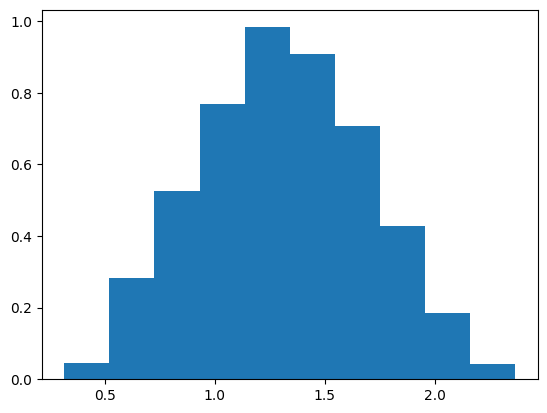

The response variable is partially normally distributed


In [57]:
# Histogram of the response variable with y-axis as probability density and x-axis as the response variable
plt.hist(data_features['CO(GT)'], bins=10, density=True)
plt.show()

print('The response variable is partially normally distributed')



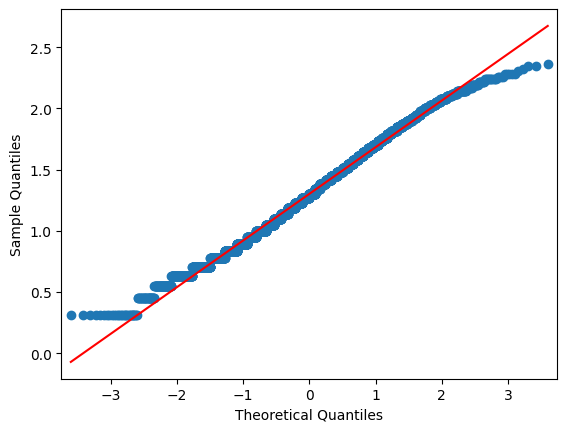

In [58]:
# QQ plot for the response variable
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(data_features['CO(GT)'], line='s')
plt.show()


In [60]:
# Linear Regression Equation
model = LinearRegression()
model.fit(X_train, y_train)

# Equation
print('y =', model.intercept_, '+', model.coef_[0], 'x1' '+', model.coef_[1], 'x2','+', model.coef_[2], 'x3' , '+', model.coef_[3], 'x4')

y = 1.8458370445262853 + 0.0 x1+ 0.8781870464136747 x2 + -0.08270545739432614 x3 + 0.00527659184496343 x4


***Conclusion***

The air quality dataset was used to predict the target variable(CO) using the linear regression, random forest, gradient boosting, and KNN regressor models. The models were trained using the training data and then used to predict the target variable using the test data. The performance of all the models is almost close to each other. The Gradient Boosting model has the lowest RMSE and the highest R-squared, which means that it is the best model for predicting the target variable. The linear regression model has the highest RMSE and the lowest R-squared